In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en import English
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import string
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/interim/gdeltproject_data_without_BBC')

In [3]:
df.head()

,Unnamed: 0,URL,Station,Show,IAShowID,IAPreviewThumb,Snippet,date
0,0,https://archive.org/details/MSNBC_20090702_180...,MSNBC,MSNBC News Live,MSNBC_20090702_180000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_18...,represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30
1,1,https://archive.org/details/MSNBC_20090702_190...,MSNBC,MSNBC News Live,MSNBC_20090702_190000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_19...,ma a lf headway with th climate change bill an...,2009-07-02 19:51:52
2,2,https://archive.org/details/FOXNEWS_20090702_2...,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20090702_221612_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20090702_...,they spent in the fat years money on such fash...,2009-07-02 22:54:51
3,3,https://archive.org/details/FOXNEWS_20090703_0...,FOXNEWS,The OReilly Factor,FOXNEWS_20090703_000000_The_OReilly_Factor,https://archive.org/download/FOXNEWS_20090703_...,"active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33
4,4,https://archive.org/details/FOXNEWS_20090703_0...,FOXNEWS,Greta Van Susteren,FOXNEWS_20090703_020000_Greta_Van_Susteren,https://archive.org/download/FOXNEWS_20090703_...,representative from washington state. he went ...,2009-07-03 02:44:09


In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
df = df.drop(['Unnamed: 0', 'URL'],axis=1)

In [6]:
df.head()

,Station,Show,IAShowID,IAPreviewThumb,Snippet,date
0,MSNBC,MSNBC News Live,MSNBC_20090702_180000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_18...,represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30
1,MSNBC,MSNBC News Live,MSNBC_20090702_190000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_19...,ma a lf headway with th climate change bill an...,2009-07-02 19:51:52
2,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20090702_221612_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20090702_...,they spent in the fat years money on such fash...,2009-07-02 22:54:51
3,FOXNEWS,The OReilly Factor,FOXNEWS_20090703_000000_The_OReilly_Factor,https://archive.org/download/FOXNEWS_20090703_...,"active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33
4,FOXNEWS,Greta Van Susteren,FOXNEWS_20090703_020000_Greta_Van_Susteren,https://archive.org/download/FOXNEWS_20090703_...,representative from washington state. he went ...,2009-07-03 02:44:09


In [7]:
df.rename({'Snippet':'text'}, axis=1, inplace=True)

In [8]:
df.head()

,Station,Show,IAShowID,IAPreviewThumb,text,date
0,MSNBC,MSNBC News Live,MSNBC_20090702_180000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_18...,represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30
1,MSNBC,MSNBC News Live,MSNBC_20090702_190000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_19...,ma a lf headway with th climate change bill an...,2009-07-02 19:51:52
2,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20090702_221612_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20090702_...,they spent in the fat years money on such fash...,2009-07-02 22:54:51
3,FOXNEWS,The OReilly Factor,FOXNEWS_20090703_000000_The_OReilly_Factor,https://archive.org/download/FOXNEWS_20090703_...,"active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33
4,FOXNEWS,Greta Van Susteren,FOXNEWS_20090703_020000_Greta_Van_Susteren,https://archive.org/download/FOXNEWS_20090703_...,representative from washington state. he went ...,2009-07-03 02:44:09


In [439]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [440]:
df.head(10)

,Station,Show,IAShowID,IAPreviewThumb,text,date
0,MSNBC,MSNBC News Live,MSNBC_20090702_180000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_18...,represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30
1,MSNBC,MSNBC News Live,MSNBC_20090702_190000_MSNBC_News_Live,https://archive.org/download/MSNBC_20090702_19...,ma a lf headway with th climate change bill an...,2009-07-02 19:51:52
2,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20090702_221612_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20090702_...,they spent in the fat years money on such fash...,2009-07-02 22:54:51
3,FOXNEWS,The OReilly Factor,FOXNEWS_20090703_000000_The_OReilly_Factor,https://archive.org/download/FOXNEWS_20090703_...,"active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33
4,FOXNEWS,Greta Van Susteren,FOXNEWS_20090703_020000_Greta_Van_Susteren,https://archive.org/download/FOXNEWS_20090703_...,representative from washington state. he went ...,2009-07-03 02:44:09
5,FOXNEWS,The OReilly Factor,FOXNEWS_20090703_030000_The_OReilly_Factor,https://archive.org/download/FOXNEWS_20090703_...,she did not ask about human rights. she asked ...,2009-07-03 03:08:38
6,FOXNEWS,Greta Van Susteren,FOXNEWS_20090703_051552_Greta_Van_Susteren,https://archive.org/download/FOXNEWS_20090703_...,they go. greta: like? the galapagos islands fo...,2009-07-03 05:43:57
7,FOXNEWS,Glenn Beck,FOXNEWS_20090703_060000_Glenn_Beck,https://archive.org/download/FOXNEWS_20090703_...,warming or not. claims that global warming is ...,2009-07-03 06:09:37
8,FOXNEWS,Glenn Beck,FOXNEWS_20090703_060000_Glenn_Beck,https://archive.org/download/FOXNEWS_20090703_...,"if you are worried about global warming, and i...",2009-07-03 06:15:20
9,FOXNEWS,The OReilly Factor,FOXNEWS_20090703_090000_The_OReilly_Factor,https://archive.org/download/FOXNEWS_20090703_...,"active? why not? no, we are not. nancy pelosi ...",2009-07-03 09:08:33


In [441]:
df.tail(10)

,Station,Show,IAShowID,IAPreviewThumb,text,date
71588,FOXNEWS,FOX and Friends,FOXNEWSW_20200121_110000_FOX_and_Friends,https://archive.org/download/FOXNEWSW_20200121...,ainsley: i see ivanka in the background. steve...,2020-01-21 11:26:48
71589,CNN,New Day With Alisyn Camerota and John Berman,CNNW_20200121_105900_New_Day_With_Alisyn_Camer...,https://archive.org/download/CNNW_20200121_105...,"administration's policies, but this forum this...",2020-01-21 11:29:36
71590,CNN,New Day With Alisyn Camerota and John Berman,CNNW_20200121_105900_New_Day_With_Alisyn_Camer...,https://archive.org/download/CNNW_20200121_105...,of this forum and the attendees. the president...,2020-01-21 11:29:51
71591,CNN,New Day With Alisyn Camerota and John Berman,CNNW_20200121_105900_New_Day_With_Alisyn_Camer...,https://archive.org/download/CNNW_20200121_105...,science around climate change merely as alarmi...,2020-01-21 11:30:08
71592,CNN,New Day With Alisyn Camerota and John Berman,CNNW_20200121_105900_New_Day_With_Alisyn_Camer...,https://archive.org/download/CNNW_20200121_105...,trump:'all of this with the global warming. a ...,2020-01-21 11:51:07
71593,CNN,New Day With Alisyn Camerota and John Berman,CNNW_20200121_120000_New_Day_With_Alisyn_Camer...,https://archive.org/download/CNNW_20200121_120...,initiative. that's not going to be enough to u...,2020-01-21 12:13:11
71594,FOXNEWS,Americas Newsroom,FOXNEWSW_20200121_140000_Americas_Newsroom,https://archive.org/download/FOXNEWSW_20200121...,"environment policy and global warming, one of ...",2020-01-21 14:06:02
71595,FOXNEWS,Americas Newsroom,FOXNEWSW_20200121_140000_Americas_Newsroom,https://archive.org/download/FOXNEWSW_20200121...,about climate change. charles? that's low-hang...,2020-01-21 15:55:57
71596,CNN,The Senate Trial of Donald J. Trump,CNNW_20200121_150000_The_Senate_Trial_of_Donal...,https://archive.org/download/CNNW_20200121_150...,bring out the bold™. asand achieved new york c...,2020-01-21 16:35:00
71597,CNN,The Senate Trial of Donald J. Trump,CNNW_20200121_150000_The_Senate_Trial_of_Donal...,https://archive.org/download/CNNW_20200121_150...,"in history. as president, he intends to reduce...",2020-01-21 16:35:15


In [183]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

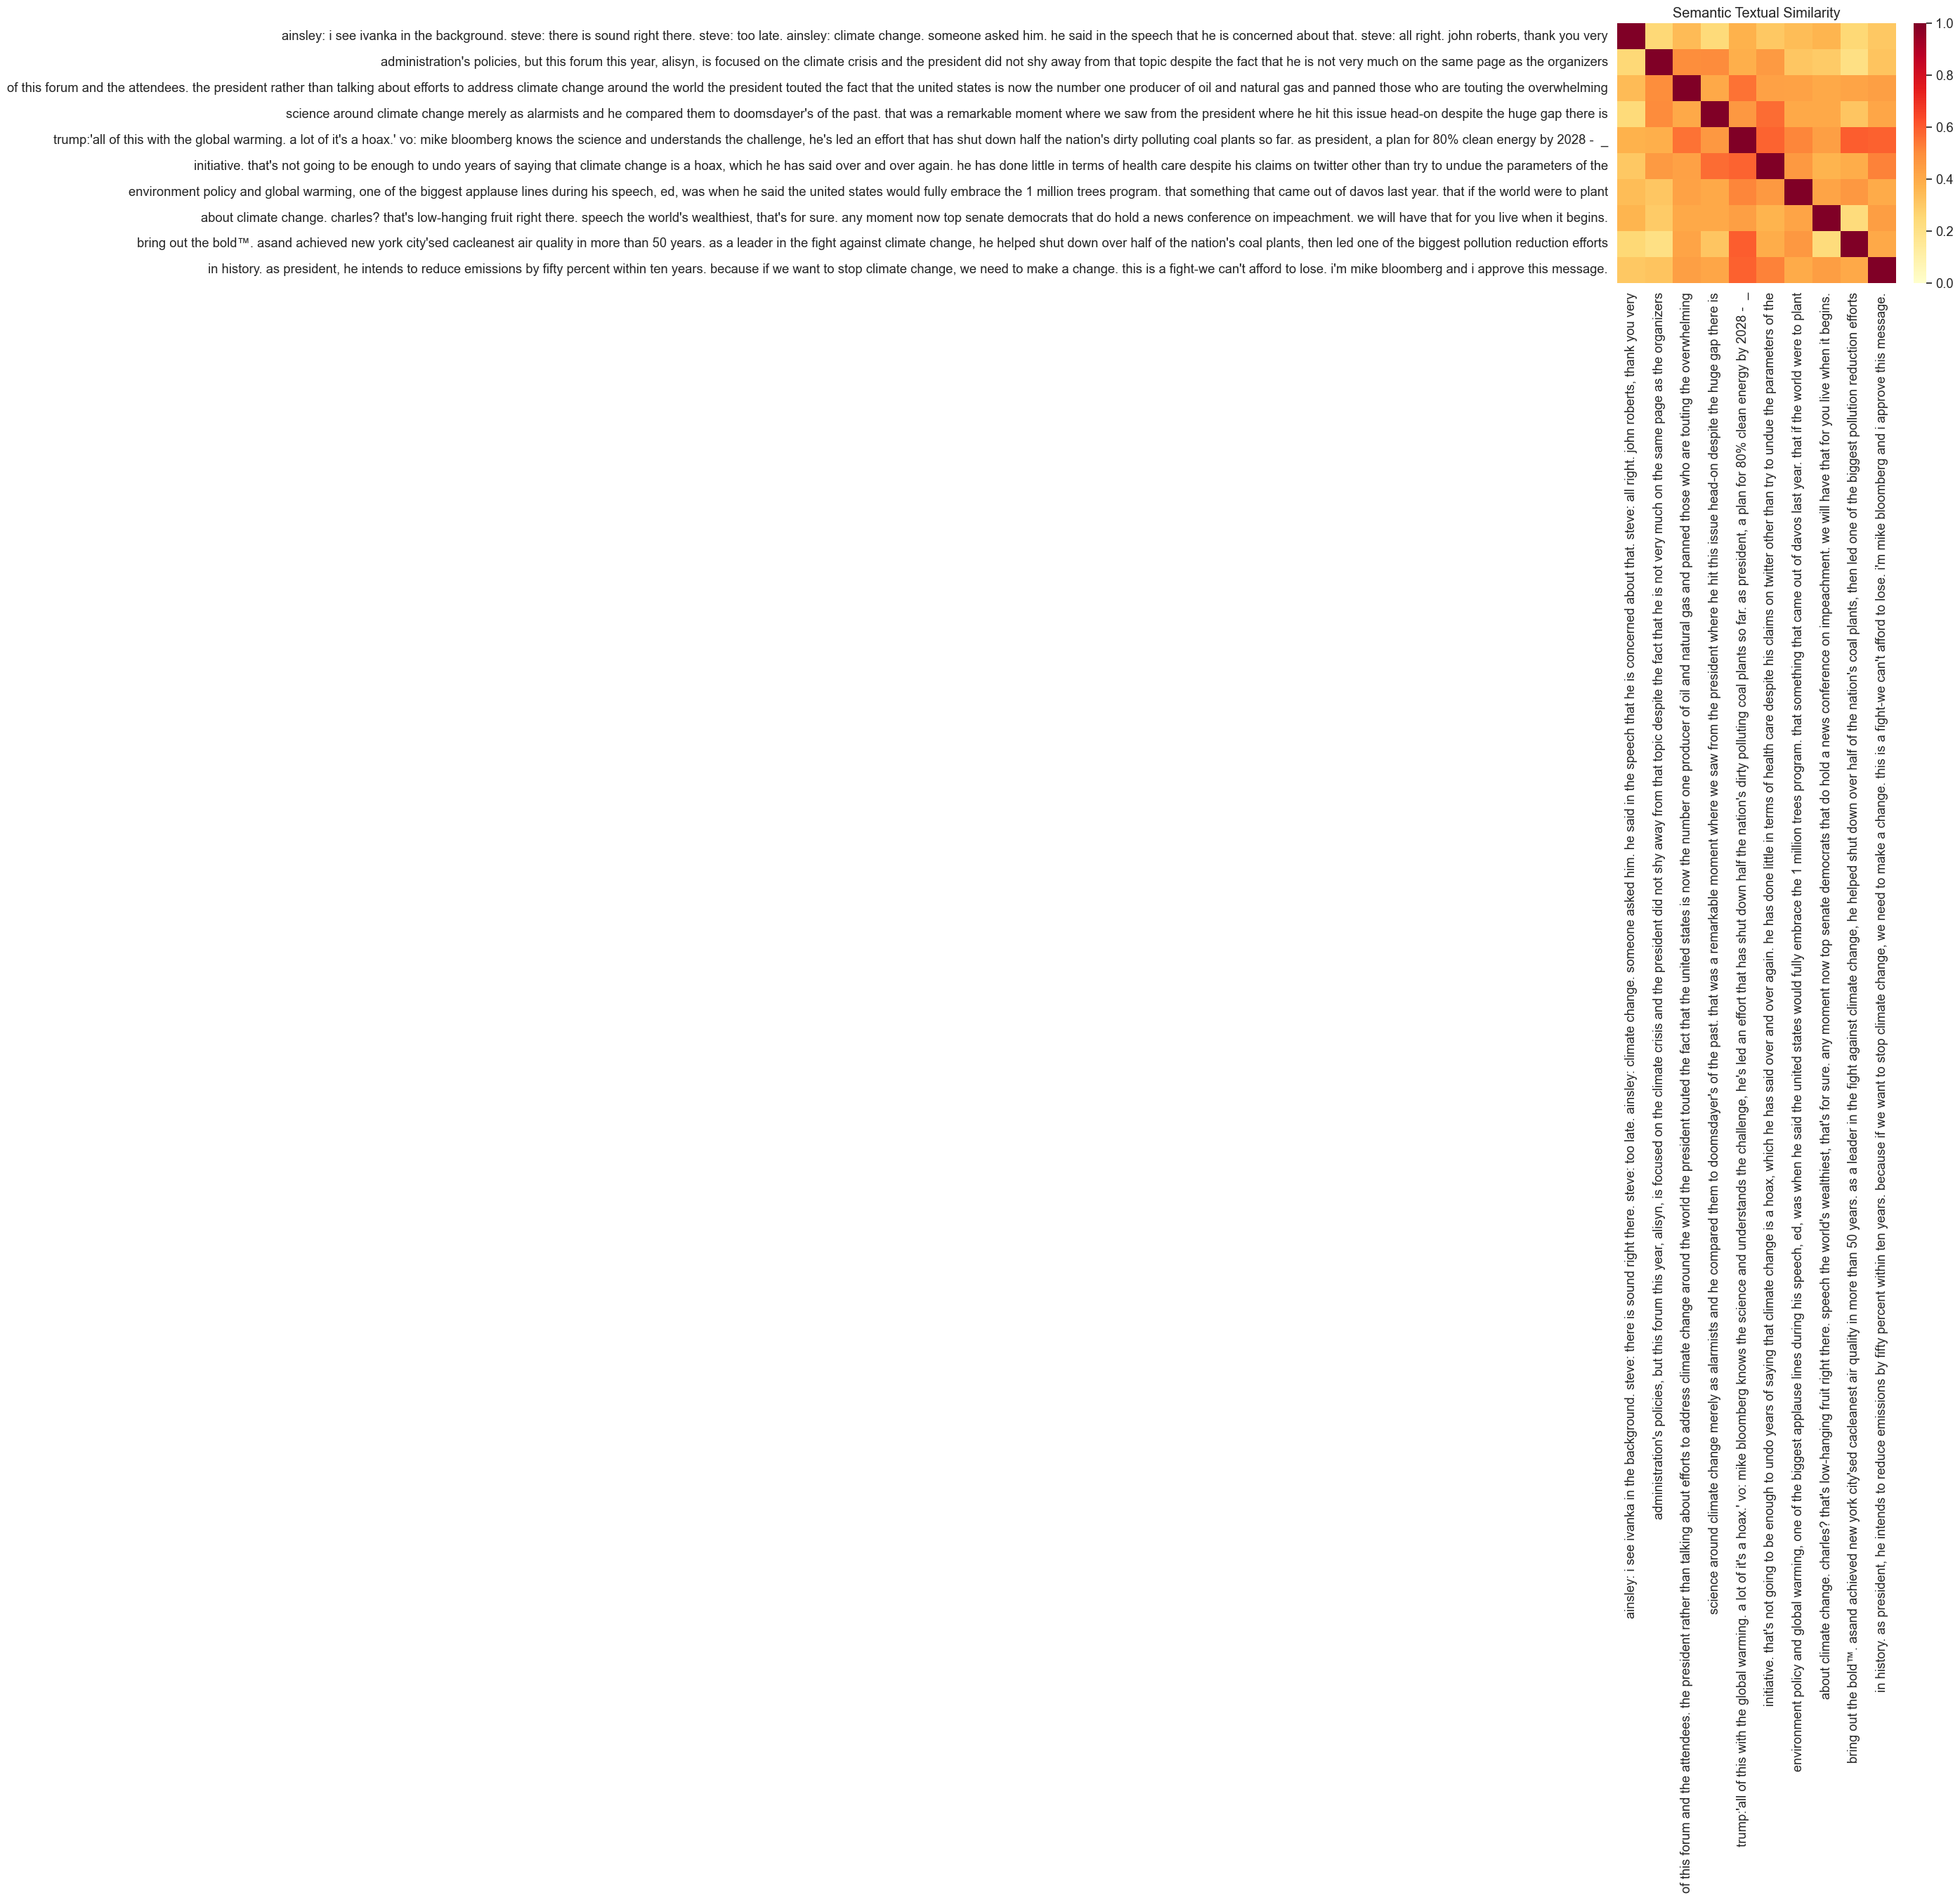

In [ ]:
messages = df.iloc[71588:, 4]

run_and_plot(messages)

In [9]:
df = df.rename({'IAShowID':'lemmas', 'IAPreviewThumb':'nlp'}, axis=1)

In [10]:
stopword_list = nltk.corpus.stopwords.words('english')

In [11]:
stopword_list.remove('no')

In [12]:
stopword_list.remove('not')

In [13]:
df['nlp'] = df['text'].apply(lambda x: nlp(x))

KeyboardInterrupt: 

In [ ]:
df['entities'] = df['Show'].copy()

In [ ]:
for i in range(len(df)):
    df['lemmas'].loc[i] = [token.lemma_ for token in df['nlp'].loc[i]]
    lst = df['lemmas'].loc[i] 
    lst1 = [x for x in lst if x not in stopword_list]
    df['lemmas'].loc[i] = [x for x in lst1 if x not in string.punctuation]
    df['entities'].loc[i] = [(ent.text, ent.label_) for ent in df['nlp'].loc[i].ents]

In [ ]:
df.head()

In [450]:
df.to_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/interim/nlp_gdelt_data')

In [24]:
df['ruse'] = df['Show'].copy()
for i in range(len(df)):
    if 'ruse' in df['lemmas'].loc[i]:
        
        df['ruse'].loc[i] = True
    else:
        df['ruse'].loc[i] = False

/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/4270340519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ruse'].loc[i] = False
/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/4270340519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ruse'].loc[i] = True


In [25]:
(df['ruse'] == True).value_counts()

False    71597
True         1
Name: ruse, dtype: int64

In [26]:
ruse_list = df.index[df['ruse']].tolist()

In [27]:
df['hoax'] = df['Show'].copy()
for i in range(len(df)):
    if 'hoax' in df['lemmas'].loc[i]:
        
        df['hoax'].loc[i] = True
    else:
        df['hoax'].loc[i] = False

/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/3574217333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hoax'].loc[i] = False
/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/3574217333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hoax'].loc[i] = True


In [28]:
df['deception'] = df['Show'].copy()
for i in range(len(df)):
    if 'deception' in df['lemmas'].loc[i]:
        
        df['deception'].loc[i] = True
    else:
        df['deception'].loc[i] = False

/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/1409606817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deception'].loc[i] = False
/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/1409606817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deception'].loc[i] = True


In [29]:
(df['deception'] == True).value_counts()

False    71579
True        19
Name: deception, dtype: int64

In [30]:
deception_list = df.index[df['deception']].tolist()

In [31]:
(df['hoax'] == True).value_counts()

False    70113
True      1485
Name: hoax, dtype: int64

In [32]:
hoax_list = df.index[df['hoax']].tolist()

In [33]:
df['fraud'] = df['Show']
for i in range(len(df)):
    if 'fraud' in df['lemmas'].loc[i]:
        
        df['fraud'].loc[i] = True
    else:
        df['fraud'].loc[i] = False

/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/210806660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fraud'].loc[i] = False
/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_851/210806660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fraud'].loc[i] = True


In [34]:
(df['fraud'] == True).value_counts()

False    71496
True       102
Name: fraud, dtype: int64

In [35]:
fraud_list = df.index[df['fraud']].tolist()

In [14]:
df = pd.read_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/interim/nlp_gdelt_data.csv')

In [15]:
df.head()

,Unnamed: 0,Station,Show,lemmas,nlp,text,date,entities
0,0,MSNBC,MSNBC News Live,"['represesentitis', 'pass', 'ann', 'traordinar...",represesentitis passed ann traordinary piece o...,represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30,"[('represesentitis', 'NORP'), ('ann traordinar..."
1,1,MSNBC,MSNBC News Live,"['lf', 'headway', 'th', 'climate', 'change', '...",ma a lf headway with th climate change bill an...,ma a lf headway with th climate change bill an...,2009-07-02 19:51:52,"[('democrats', 'NORP')]"
2,2,FOXNEWS,Special Report With Bret Baier,"['spend', 'fat', 'year', 'money', 'fashion', '...",they spent in the fat years money on such fash...,they spent in the fat years money on such fash...,2009-07-02 22:54:51,"[('the fat years', 'DATE'), ('george bush', 'P..."
3,3,FOXNEWS,The OReilly Factor,"['active', 'not', 'no', 'not', 'nancy', 'pelos...","active? why not? no, we are not. nancy pelosi ...","active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33,"[('nancy', 'PERSON'), ('china', 'GPE'), ('chin..."
4,4,FOXNEWS,Greta Van Susteren,"['representative', 'washington', 'state', 'go'...",representative from washington state. he went ...,representative from washington state. he went ...,2009-07-03 02:44:09,"[('washington', 'GPE'), ('congress', 'ORG')]"


In [16]:
df.tail()

,Unnamed: 0,Station,Show,lemmas,nlp,text,date,entities
71593,71593,CNN,New Day With Alisyn Camerota and John Berman,"['initiative', 'not', 'go', 'enough', 'undo', ...",initiative. that's not going to be enough to u...,initiative. that's not going to be enough to u...,2020-01-21 12:13:11,"[('years', 'DATE')]"
71594,71594,FOXNEWS,Americas Newsroom,"['environment', 'policy', 'global', 'warming',...","environment policy and global warming, one of ...","environment policy and global warming, one of ...",2020-01-21 14:06:02,"[('one', 'CARDINAL'), ('ed', 'PERSON'), ('the ..."
71595,71595,FOXNEWS,Americas Newsroom,"['climate', 'change', 'charles', 'low', 'hang'...",about climate change. charles? that's low-hang...,about climate change. charles? that's low-hang...,2020-01-21 15:55:57,"[('charles', 'PERSON'), ('senate', 'ORG'), ('d..."
71596,71596,CNN,The Senate Trial of Donald J. Trump,"['bring', 'bold', '™', 'asand', 'achieve', 'ne...",bring out the bold™. asand achieved new york c...,bring out the bold™. asand achieved new york c...,2020-01-21 16:35:00,"[('asand', 'ORG'), ('new york', 'GPE'), ('cacl..."
71597,71597,CNN,The Senate Trial of Donald J. Trump,"['history', 'president', 'intend', 'reduce', '...","in history. as president, he intends to reduce...","in history. as president, he intends to reduce...",2020-01-21 16:35:15,"[('fifty percent', 'PERCENT'), ('ten years', '..."


In [466]:
df.head()

,index,Station,Show,lemmas,nlp,text,date,entities,ruse,hoax,deception,fraud
0,0,MSNBC,MSNBC News Live,"[represesentitis, pass, ann, traordinary, piec...","(represesentitis, passed, ann, traordinary, pi...",represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30,"[(represesentitis, NORP), (ann traordinary, PE...",False,False,False,False
1,1,MSNBC,MSNBC News Live,"[lf, headway, th, climate, change, bill, right...","(ma, a, lf, headway, with, th, climate, change...",ma a lf headway with th climate change bill an...,2009-07-02 19:51:52,"[(democrats, NORP)]",False,False,False,False
2,2,FOXNEWS,Special Report With Bret Baier,"[spend, fat, year, money, fashion, global, war...","(they, spent, in, the, fat, years, money, on, ...",they spent in the fat years money on such fash...,2009-07-02 22:54:51,"[(the fat years, DATE), (george bush, PERSON)]",False,False,False,False
3,3,FOXNEWS,The OReilly Factor,"[active, not, no, not, nancy, pelosi, go, chin...","(active, ?, why, not, ?, no, ,, we, are, not, ...","active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33,"[(nancy, PERSON), (china, GPE), (chinese, NORP)]",False,False,False,False
4,4,FOXNEWS,Greta Van Susteren,"[representative, washington, state, go, global...","(representative, from, washington, state, ., h...",representative from washington state. he went ...,2009-07-03 02:44:09,"[(washington, GPE), (congress, ORG)]",False,False,False,False


In [38]:
type(df['nlp'].loc[0])

spacy.tokens.doc.Doc

In [17]:
type(df['lemmas'].loc[0])

str

In [39]:
v = (df['nlp'].loc[0]).vector

In [40]:
columns = np.arange(0, 300)

In [41]:
vectors = pd.DataFrame(v.reshape(-1, len(v)),columns=columns)

In [42]:
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.596656,0.347621,-2.257069,0.495351,4.867102,0.366274,0.512093,4.183856,-0.245201,-1.290185,...,-0.053827,0.200238,0.72723,-0.679028,-2.157436,0.666465,0.297952,-1.642269,-1.993667,0.28014


In [43]:
for i in range(1, len(df)):
    v = (df['nlp'].loc[i]).vector
    nv = pd.Series(v)
    
    vectors.loc[i] = nv 

In [44]:
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.596656,0.347621,-2.257069,0.495351,4.867102,0.366274,0.512093,4.183856,-0.245201,-1.290185,...,-0.053827,0.200238,0.727230,-0.679028,-2.157436,0.666465,0.297952,-1.642269,-1.993667,0.280140
1,-0.805082,2.583438,-3.521056,0.043741,1.455319,1.609248,-0.644897,3.503685,-2.364594,-0.245733,...,1.192470,-0.918497,0.714955,-0.616731,-1.504193,0.057616,0.711415,0.006922,-3.720927,2.957853
2,-2.166549,1.355362,-3.326613,0.218726,4.367498,-0.368034,0.174239,5.277479,-0.150614,-0.382138,...,0.620030,-0.588768,-0.054140,-0.778297,-2.117959,1.194956,1.097884,-1.360946,-2.945257,0.548940
3,-0.693159,2.244573,-3.076314,-0.996297,2.179623,0.869303,0.441548,3.266567,-2.226234,-0.551281,...,1.091898,-0.789200,0.972085,-2.388285,-1.046922,-1.279353,0.459607,0.632234,-3.136846,2.388879
4,-1.328495,0.319717,-3.142270,-0.247995,4.884183,0.512790,-0.409552,5.318149,-0.724909,-1.626088,...,-0.448757,-0.939034,-1.229582,-1.480443,-1.887180,0.348665,0.192463,-0.715668,-3.906846,0.900411


In [45]:
vectors.to_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/interim/_vectors_nlp_gdelt.csv')

In [50]:
X = vectors

In [82]:
idx = vectors.index

In [79]:
inertia_values = []
sil_scores = []
for i in range(2,10):
    mod = KMeans(n_clusters=i, n_init='auto')
    mod.fit(vectors)
    inertia_values.append(mod.inertia_)
    labels = mod.predict(vectors)
    sil = silhouette_score(vectors, labels)
    sil_scores.append(sil)
    

In [81]:
inertia_values

[9126942.0,
 8679742.0,
 8311141.0,
 8079461.0,
 7882849.0,
 7730123.0,
 7608168.0,
 7490041.0]

In [80]:
sil_scores

[0.13321286,
 0.073403895,
 0.0722164,
 0.06840106,
 0.06679123,
 0.059534516,
 0.06030997,
 0.05154126]

In [83]:
mod = KMeans(n_clusters=2)
mod.fit(vectors)

/Users/butler/anaconda3/envs/Capstone_three/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [88]:
vectors['label'] = mod.labels_

In [89]:
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-1.596656,0.347621,-2.257069,0.495351,4.867102,0.366274,0.512093,4.183856,-0.245201,-1.290185,...,0.200238,0.727230,-0.679028,-2.157436,0.666465,0.297952,-1.642269,-1.993667,0.280140,1
1,-0.805082,2.583438,-3.521056,0.043741,1.455319,1.609248,-0.644897,3.503685,-2.364594,-0.245733,...,-0.918497,0.714955,-0.616731,-1.504193,0.057616,0.711415,0.006922,-3.720927,2.957853,0
2,-2.166549,1.355362,-3.326613,0.218726,4.367498,-0.368034,0.174239,5.277479,-0.150614,-0.382138,...,-0.588768,-0.054140,-0.778297,-2.117959,1.194956,1.097884,-1.360946,-2.945257,0.548940,1
3,-0.693159,2.244573,-3.076314,-0.996297,2.179623,0.869303,0.441548,3.266567,-2.226234,-0.551281,...,-0.789200,0.972085,-2.388285,-1.046922,-1.279353,0.459607,0.632234,-3.136846,2.388879,0
4,-1.328495,0.319717,-3.142270,-0.247995,4.884183,0.512790,-0.409552,5.318149,-0.724909,-1.626088,...,-0.939034,-1.229582,-1.480443,-1.887180,0.348665,0.192463,-0.715668,-3.906846,0.900411,1


In [90]:
df['pred_labels'] = mod.labels_

In [92]:
df.head(10)

,Unnamed: 0,Station,Show,lemmas,nlp,text,date,entities,ruse,hoax,deception,fraud,pred_labels
0,0,MSNBC,MSNBC News Live,"[represesentitis, pass, ann, traordinary, piec...","(represesentitis, passed, ann, traordinary, pi...",represesentitis passed ann traordinary piece o...,2009-07-02 18:40:30,"[(represesentitis, NORP), (ann traordinary, PE...",False,False,False,False,1
1,1,MSNBC,MSNBC News Live,"[lf, headway, th, climate, change, bill, right...","(ma, a, lf, headway, with, th, climate, change...",ma a lf headway with th climate change bill an...,2009-07-02 19:51:52,"[(democrats, NORP)]",False,False,False,False,0
2,2,FOXNEWS,Special Report With Bret Baier,"[spend, fat, year, money, fashion, global, war...","(they, spent, in, the, fat, years, money, on, ...",they spent in the fat years money on such fash...,2009-07-02 22:54:51,"[(the fat years, DATE), (george bush, PERSON)]",False,False,False,False,1
3,3,FOXNEWS,The OReilly Factor,"[active, not, no, not, nancy, pelosi, go, chin...","(active, ?, why, not, ?, no, ,, we, are, not, ...","active? why not? no, we are not. nancy pelosi ...",2009-07-03 00:08:33,"[(nancy, PERSON), (china, GPE), (chinese, NORP)]",False,False,False,False,0
4,4,FOXNEWS,Greta Van Susteren,"[representative, washington, state, go, global...","(representative, from, washington, state, ., h...",representative from washington state. he went ...,2009-07-03 02:44:09,"[(washington, GPE), (congress, ORG)]",False,False,False,False,1
5,5,FOXNEWS,The OReilly Factor,"[not, ask, human, right, ask, global, warming,...","(she, did, not, ask, about, human, rights, ., ...",she did not ask about human rights. she asked ...,2009-07-03 03:08:38,"[(chinese, NORP)]",False,False,False,False,0
6,6,FOXNEWS,Greta Van Susteren,"[go, greta, like, galapagos, island, one, repr...","(they, go, ., greta, :, like, ?, the, galapago...",they go. greta: like? the galapagos islands fo...,2009-07-03 05:43:57,"[(washington, GPE)]",False,False,False,False,1
7,7,FOXNEWS,Glenn Beck,"[warming, not, claim, global, warming, go, jun...","(warming, or, not, ., claims, that, global, wa...",warming or not. claims that global warming is ...,2009-07-03 06:09:37,"[(congress, ORG)]",False,False,False,False,1
8,8,FOXNEWS,Glenn Beck,"[worried, global, warming, I, not, know, would...","(if, you, are, worried, about, global, warming...","if you are worried about global warming, and i...",2009-07-03 06:15:20,[],False,False,False,False,0
9,9,FOXNEWS,The OReilly Factor,"[active, not, no, not, nancy, pelosi, go, chin...","(active, ?, why, not, ?, no, ,, we, are, not, ...","active? why not? no, we are not. nancy pelosi ...",2009-07-03 09:08:33,"[(nancy, PERSON), (china, GPE), (chinese, NORP)]",False,False,False,False,0


In [93]:
df.tail(10)

,Unnamed: 0,Station,Show,lemmas,nlp,text,date,entities,ruse,hoax,deception,fraud,pred_labels
71588,71588,FOXNEWS,FOX and Friends,"[ainsley, I, see, ivanka, background, steve, s...","(ainsley, :, i, see, ivanka, in, the, backgrou...",ainsley: i see ivanka in the background. steve...,2020-01-21 11:26:48,"[(steve, PERSON), (steve, PERSON), (ainsley, O...",False,False,False,False,0
71589,71589,CNN,New Day With Alisyn Camerota and John Berman,"[administration, 's, policy, forum, year, alis...","(administration, 's, policies, ,, but, this, f...","administration's policies, but this forum this...",2020-01-21 11:29:36,"[(this year, DATE), (alisyn, ORG)]",False,False,False,False,1
71590,71590,CNN,New Day With Alisyn Camerota and John Berman,"[forum, attendee, president, rather, talk, eff...","(of, this, forum, and, the, attendees, ., the,...",of this forum and the attendees. the president...,2020-01-21 11:29:51,"[(the united states, GPE), (one, CARDINAL)]",False,False,False,False,1
71591,71591,CNN,New Day With Alisyn Camerota and John Berman,"[science, around, climate, change, merely, ala...","(science, around, climate, change, merely, as,...",science around climate change merely as alarmi...,2020-01-21 11:30:08,"[(doomsdayer, PERSON)]",False,False,False,False,1
71592,71592,CNN,New Day With Alisyn Camerota and John Berman,"[trump:'all, global, warming, lot, hoax, vo, m...","(trump:'all, of, this, with, the, global, warm...",trump:'all of this with the global warming. a ...,2020-01-21 11:51:07,"[(mike bloomberg, PERSON), (half, CARDINAL), (...",False,True,False,False,1
71593,71593,CNN,New Day With Alisyn Camerota and John Berman,"[initiative, not, go, enough, undo, year, say,...","(initiative, ., that, 's, not, going, to, be, ...",initiative. that's not going to be enough to u...,2020-01-21 12:13:11,"[(years, DATE)]",False,True,False,False,1
71594,71594,FOXNEWS,Americas Newsroom,"[environment, policy, global, warming, one, bi...","(environment, policy, and, global, warming, ,,...","environment policy and global warming, one of ...",2020-01-21 14:06:02,"[(one, CARDINAL), (ed, PERSON), (the united st...",False,False,False,False,1
71595,71595,FOXNEWS,Americas Newsroom,"[climate, change, charles, low, hang, fruit, r...","(about, climate, change, ., charles, ?, that, ...",about climate change. charles? that's low-hang...,2020-01-21 15:55:57,"[(charles, PERSON), (senate, ORG), (democrats,...",False,False,False,False,0
71596,71596,CNN,The Senate Trial of Donald J. Trump,"[bring, bold, ™, asand, achieve, new, york, ci...","(bring, out, the, bold, ™, ., asand, achieved,...",bring out the bold™. asand achieved new york c...,2020-01-21 16:35:00,"[(asand, ORG), (new york, GPE), (cacleanest ai...",False,False,False,False,1
71597,71597,CNN,The Senate Trial of Donald J. Trump,"[history, president, intend, reduce, emission,...","(in, history, ., as, president, ,, he, intends...","in history. as president, he intends to reduce...",2020-01-21 16:35:15,"[(fifty percent, PERCENT), (ten years, DATE), ...",False,False,False,False,0


In [95]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [84]:
k = vectors.to_numpy()

In [85]:
type(k)

numpy.ndarray

In [86]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(k)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(mod.cluster_centers_)

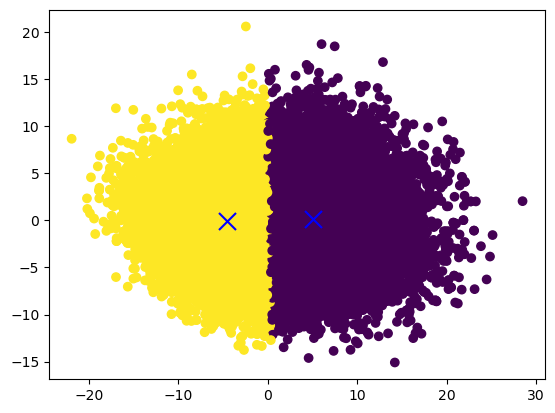

In [87]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=mod.predict(k))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [97]:
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-1.596656,0.347621,-2.257069,0.495351,4.867102,0.366274,0.512093,4.183856,-0.245201,-1.290185,...,0.200238,0.727230,-0.679028,-2.157436,0.666465,0.297952,-1.642269,-1.993667,0.280140,1
1,-0.805082,2.583438,-3.521056,0.043741,1.455319,1.609248,-0.644897,3.503685,-2.364594,-0.245733,...,-0.918497,0.714955,-0.616731,-1.504193,0.057616,0.711415,0.006922,-3.720927,2.957853,0
2,-2.166549,1.355362,-3.326613,0.218726,4.367498,-0.368034,0.174239,5.277479,-0.150614,-0.382138,...,-0.588768,-0.054140,-0.778297,-2.117959,1.194956,1.097884,-1.360946,-2.945257,0.548940,1
3,-0.693159,2.244573,-3.076314,-0.996297,2.179623,0.869303,0.441548,3.266567,-2.226234,-0.551281,...,-0.789200,0.972085,-2.388285,-1.046922,-1.279353,0.459607,0.632234,-3.136846,2.388879,0
4,-1.328495,0.319717,-3.142270,-0.247995,4.884183,0.512790,-0.409552,5.318149,-0.724909,-1.626088,...,-0.939034,-1.229582,-1.480443,-1.887180,0.348665,0.192463,-0.715668,-3.906846,0.900411,1


In [99]:
X = vectors.drop(['label'],axis=1)

In [100]:
mod = KMeans(n_clusters=3)
mod.fit(X)

/Users/butler/anaconda3/envs/Capstone_three/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [101]:
vectors['3-labels'] = mod.labels_

In [102]:
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,3-labels
0,-1.596656,0.347621,-2.257069,0.495351,4.867102,0.366274,0.512093,4.183856,-0.245201,-1.290185,...,0.727230,-0.679028,-2.157436,0.666465,0.297952,-1.642269,-1.993667,0.280140,1,0
1,-0.805082,2.583438,-3.521056,0.043741,1.455319,1.609248,-0.644897,3.503685,-2.364594,-0.245733,...,0.714955,-0.616731,-1.504193,0.057616,0.711415,0.006922,-3.720927,2.957853,0,1
2,-2.166549,1.355362,-3.326613,0.218726,4.367498,-0.368034,0.174239,5.277479,-0.150614,-0.382138,...,-0.054140,-0.778297,-2.117959,1.194956,1.097884,-1.360946,-2.945257,0.548940,1,0
3,-0.693159,2.244573,-3.076314,-0.996297,2.179623,0.869303,0.441548,3.266567,-2.226234,-0.551281,...,0.972085,-2.388285,-1.046922,-1.279353,0.459607,0.632234,-3.136846,2.388879,0,1
4,-1.328495,0.319717,-3.142270,-0.247995,4.884183,0.512790,-0.409552,5.318149,-0.724909,-1.626088,...,-1.229582,-1.480443,-1.887180,0.348665,0.192463,-0.715668,-3.906846,0.900411,1,0


In [103]:
vectors.tail()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,3-labels
71593,-1.678016,2.233475,-3.028185,0.351189,4.649539,1.369803,0.539580,5.842389,0.058649,-0.919506,...,-0.745902,0.192570,-1.532476,1.302770,1.474023,-1.110016,-3.518392,1.783985,1,0
71594,-2.322394,-0.002197,-1.472125,0.575230,4.888327,0.336904,1.170842,4.950857,-0.078086,-1.666777,...,-0.824887,0.115198,-1.713615,0.971643,0.877101,-1.208582,-2.471287,1.152982,1,0
71595,-0.289360,2.011588,-3.397138,-0.166949,3.773812,0.541662,0.663208,4.474851,-1.553223,-0.410905,...,1.008741,-1.148263,-2.271970,0.322224,0.576538,0.317260,-1.916115,0.797534,0,1
71596,-1.715003,0.447262,-2.249251,1.708719,5.059546,1.032523,0.885343,5.168226,1.174408,-1.438030,...,-0.903216,0.569426,-1.130049,1.992957,0.536030,-1.232044,-2.088760,0.438578,1,0
71597,-0.955213,2.620928,-3.775067,-1.304905,1.446679,1.425837,0.098923,3.823995,-2.174430,-0.057139,...,0.395199,-0.786437,-0.845345,1.036318,0.839507,0.690173,-3.604528,2.548987,0,1


In [104]:
vectors['3-labels'].nunique()

3

In [108]:
df['3-labels'] = vectors['3-labels']

In [106]:
vectors[vectors['3-labels'] == 2].index.to_list()

[7,
 14,
 15,
 19,
 21,
 23,
 25,
 27,
 31,
 33,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 56,
 61,
 62,
 65,
 66,
 68,
 70,
 72,
 77,
 78,
 83,
 85,
 91,
 93,
 98,
 100,
 105,
 106,
 108,
 109,
 111,
 113,
 115,
 117,
 120,
 121,
 122,
 124,
 125,
 126,
 128,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 147,
 152,
 159,
 162,
 163,
 166,
 168,
 171,
 178,
 179,
 185,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 203,
 205,
 206,
 211,
 213,
 215,
 220,
 224,
 225,
 227,
 229,
 231,
 233,
 241,
 242,
 246,
 248,
 258,
 266,
 267,
 270,
 274,
 277,
 278,
 279,
 281,
 282,
 283,
 289,
 290,
 292,
 293,
 294,
 296,
 298,
 300,
 303,
 304,
 305,
 307,
 308,
 310,
 313,
 314,
 315,
 319,
 325,
 326,
 327,
 329,
 335,
 336,
 337,
 338,
 341,
 342,
 344,
 345,
 347,
 351,
 353,
 354,
 355,
 356,
 357,
 360,
 361,
 374,
 379,
 385,
 392,
 395,
 397,
 405,
 407,
 412,
 413,
 415,
 417,
 419,
 421,
 422,
 426,
 427,
 429,
 431,
 432,
 433,
 434,
 436,
 437,
 439

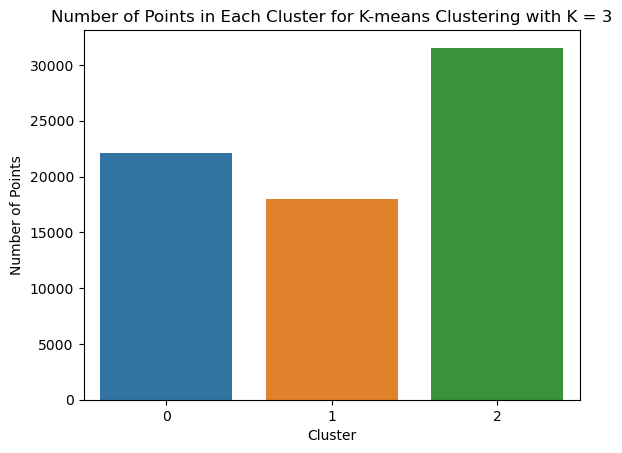

In [107]:
ax = sns.barplot(x=[0,1,2],y=np.bincount(mod.labels_))
_ = ax.set_title('Number of Points in Each Cluster for K-means Clustering with K = 3')
_ = ax.set_xlabel('Cluster')
_ = ax.set_ylabel('Number of Points')

In [109]:
df.to_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/interim/gdelt_with_labels.csv')

In [110]:
lst_0 = df[df['3-labels'] == 0].index.to_list()

In [114]:
lst_1 = df[df['3-labels'] == 1].index.to_list()

In [115]:
lst_2 = df[df['3-labels'] == 2].index.to_list()

In [111]:
hoax_0 = [x for x in lst_0 if x in hoax_list]

In [113]:
len(hoax_0)

338

In [116]:
hoax_1 = [x for x in lst_1 if x in hoax_list]

In [117]:
len(hoax_1)

357

In [118]:
hoax_2 = [x for x in lst_2 if x in hoax_list]

In [119]:
len(hoax_2)

790

In [18]:
df['text'].loc[3]

'active? why not? no, we are not. nancy pelosi went to china and she did not ask about human rights. she asked about global warming. the chinese saysay that is'

In [19]:
df['text'].loc[24678]

"trucks or vehicles out there. a big chunk of the greenhouse gas emission. about 20% of those emissions. the specific thing he did today doesn't sound that earth shattering. he called on the epa and the transportation department to come up with some new standards within the next year for these"